In [10]:
from bson import ObjectId
import pymongo
import time

host="192.168.50.41"
port=27017
db_name='mt'
client = pymongo.MongoClient(host, port)
db = client[db_name]
datColl = db['drift_dat']

testRecID = ObjectId("667b9014fa392856caf0cd52")

for test_rec in datColl.find({"_id": testRecID}):
    
    vals_ts = test_rec['ts']
    vals_sense_bits = test_rec['vals_sense']
    vals_t1_bits = test_rec['vals_t1']
    vals_t2_bits = test_rec['vals_t2']
    
# Convert ADC values to appropriate units
# Starting with getting the sensor output into distance (mm)
adc_bits = 14
adc_refV = 5
adc_res = adc_refV / (2**adc_bits) # adc resolution in volts/bit
sensor_sensitivity = 4.62 # sensitivity in V/mm
meas_res = adc_res / sensor_sensitivity # measurement sensitivity in mm/bit

vals_sense = []
for val in vals_sense_bits:
    vals_sense.append((val - vals_sense_bits[0]) * meas_res)
    
therm_sens = 5 / 100 #approx thermistor driver output sensitivity in V/degC
therm_res = adc_res / therm_sens
vals_t1 = []
for val in vals_t1_bits:
    vals_t1.append(val * therm_res)

vals_t2 = []
for val in vals_t2_bits:
    vals_t2.append(val * therm_res)



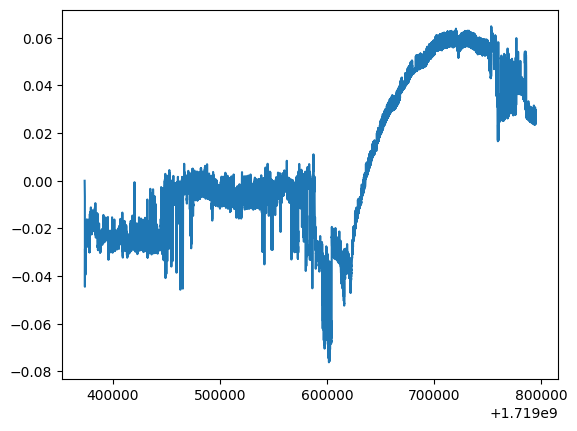

In [11]:
from matplotlib import pyplot as plt

plt.plot(vals_ts, vals_sense)

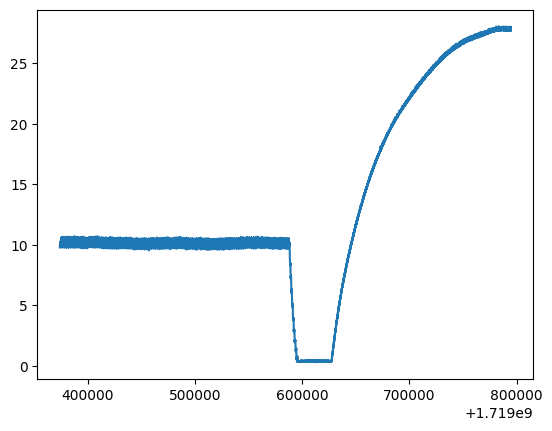

In [12]:
plt.plot(vals_ts, vals_t1)

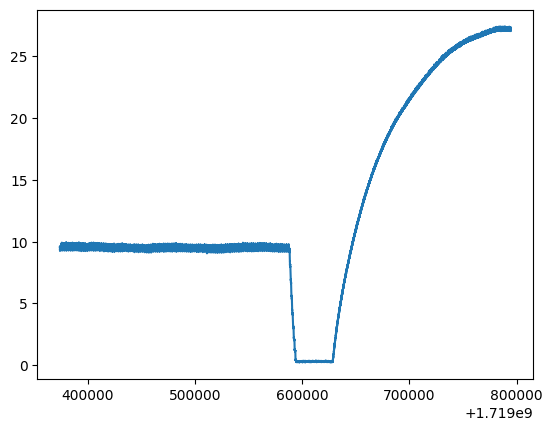

In [13]:
plt.plot(vals_ts, vals_t2)

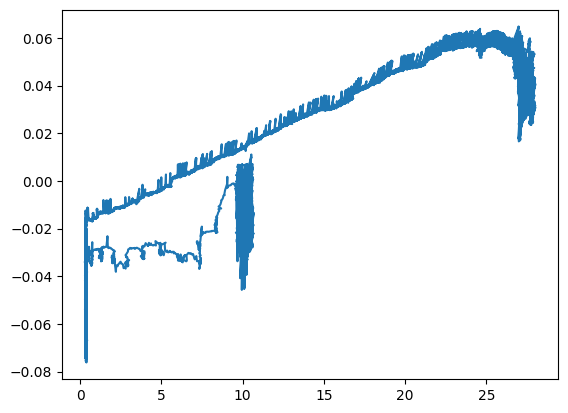

In [14]:
plt.plot(vals_t1, vals_sense)

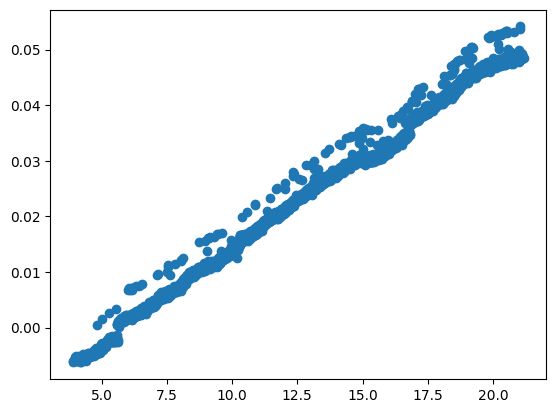

In [25]:
plt.scatter(vals_t1[26000:32000], vals_sense[26000: 32000])

In [38]:
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression()
sub_t1 = np.array(vals_t1[26000:32000])
sub_t2 = np.array(vals_t2[26000:32000])
sub_sense = np.array(vals_sense[26000:32000])
reg.fit(sub_t1.reshape((-1,1)), sub_sense)
print(f'Slope: {round(reg.coef_[0], 4)} mm/degC')

Slope: 0.0033 mm/degC


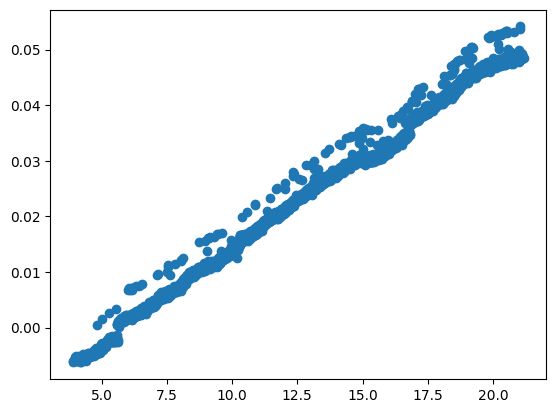

In [27]:
plt.scatter(sub_t1, sub_sense)

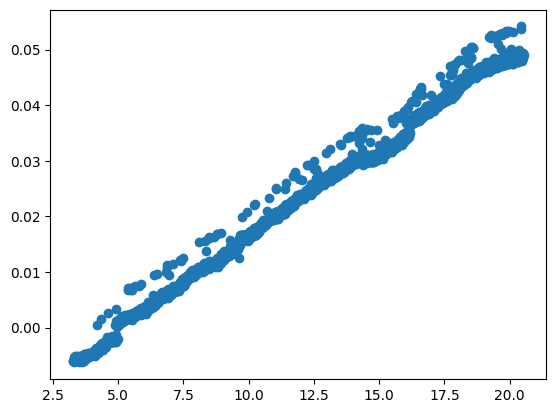

In [28]:
plt.scatter(sub_t2, sub_sense)